In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [55]:
df1 = pd.read_csv("gangnam_price_2018.csv", encoding = "cp949")

a = df1["계약년월"].values
b = df1["계약일"].values
date = []
for i in range(len(a)):
    
    date.append(str(a[i])[:4] + '-' + str(a[i])[4:] + '-' + str(b[i]))

df1["Date"] = date
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d', errors='raise')
df1 = df1.replace(',','', regex=True)
a = pd.to_numeric(df1["거래금액(만원)"])
df1["price"] = a

In [57]:
df1[df1["price"] >= 0]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,Date,price
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201801,3,130000,4,1987,언주로 3,NaN,2018-01-03,130000
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201801,8,117000,2,1987,언주로 3,NaN,2018-01-08,117000
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201801,11,130000,1,1987,언주로 3,NaN,2018-01-11,130000
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201803,19,139500,2,1987,언주로 3,NaN,2018-03-19,139500
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.980,201804,5,107500,5,1987,언주로 3,NaN,2018-04-05,107500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,서울특별시 강남구 청담동,Jan-75,75,1,현대아파트(75-1),159.080,201802,7,200000,3,1983,학동로87길 7,NaN,2018-02-07,200000
3529,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,201801,31,52000,5,2005,도산대로 454,NaN,2018-01-31,52000
3530,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,201802,26,52500,6,2005,도산대로 454,NaN,2018-02-26,52500
3531,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,201810,27,57000,22,2005,도산대로 454,NaN,2018-10-27,57000


In [41]:
df1.shape

(3533, 14)

In [36]:
df2 = pd.read_csv("gangnam_price_2019.csv", encoding = "cp949")

a = df2["계약년월"].values
b = df2["계약일"].values
date = []
for i in range(len(a)):
    
    date.append(str(a[i])[:4] + '-' + str(a[i])[4:] + '-' + str(b[i]))

df2["Date"] = date
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d', errors='raise')
# df2 = df2.replace(',','', regex=True)
a = pd.to_numeric(df2["거래금액(만원)"])
df2["price"] = a

In [51]:
df2

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,Date,price
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.750,201906,18,134500,4,1988,언주로 103,NaN,2019-06-18,134500
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.750,201911,18,160000,2,1988,언주로 103,NaN,2019-11-18,160000
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.280,201905,4,124000,4,1987,언주로 3,NaN,2019-05-04,124000
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201906,15,141000,5,1987,언주로 3,NaN,2019-06-15,141000
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201908,28,155000,4,1987,언주로 3,NaN,2019-08-28,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.260,201906,29,215000,7,1992,도산대로85길 56,NaN,2019-06-29,215000
4628,서울특별시 강남구 청담동,101-17,101,17,효성빌라 청담101(B동),226.740,201905,21,530000,3,2019,압구정로71길 28,NaN,2019-05-21,530000
4629,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,201905,27,54500,20,2005,도산대로 454,NaN,2019-05-27,54500
4630,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,201907,9,58000,6,2005,도산대로 454,NaN,2019-07-09,58000


In [42]:
df2.shape

(4632, 15)

In [38]:
df3 = pd.read_csv("gangnam_price_2020.csv", encoding = "cp949")

a = df3["계약년월"].values
b = df3["계약일"].values
date = []
for i in range(len(a)):
    
    date.append(str(a[i])[:4] + '-' + str(a[i])[4:] + '-' + str(b[i]))

df3["Date"] = date
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y-%m-%d', errors='raise')
# df3 = df3.replace(',','', regex=True)
a = pd.to_numeric(df3["거래금액(만원)"])
df3["price"] = a

In [52]:
df3

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,Date,price
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.750,202006,23,149500,4,1988,언주로 103,NaN,2020-06-23,149500
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.980,202002,24,144000,4,1987,언주로 3,NaN,2020-02-24,144000
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,18,162750,4,1987,언주로 3,NaN,2020-06-18,162750
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,20,160000,5,1987,언주로 3,NaN,2020-06-20,160000
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,22,150000,2,1987,언주로 3,NaN,2020-06-22,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.260,202004,17,185000,3,1992,도산대로85길 56,NaN,2020-04-17,185000
3825,서울특별시 강남구 청담동,101,101,0,효성빌라 청담101(A동),226.740,202011,26,620000,5,2019,압구정로71길 28,NaN,2020-11-26,620000
3826,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,202001,4,60000,22,2005,도산대로 454,NaN,2020-01-04,60000
3827,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,202003,12,59300,20,2005,도산대로 454,NaN,2020-03-12,59300


In [43]:
df3.shape

(3829, 15)

In [58]:
df = pd.concat([df1, df2, df3])
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,Date,price
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,언주로 3,NaN,2018-01-03,130000
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,언주로 3,NaN,2018-01-08,117000
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,언주로 3,NaN,2018-01-11,130000
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,언주로 3,NaN,2018-03-19,139500
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,언주로 3,NaN,2018-04-05,107500


In [60]:
df[df["price"] >= 0]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,Date,price
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201801,3,130000,4,1987,언주로 3,NaN,2018-01-03,130000
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201801,8,117000,2,1987,언주로 3,NaN,2018-01-08,117000
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201801,11,130000,1,1987,언주로 3,NaN,2018-01-11,130000
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,201803,19,139500,2,1987,언주로 3,NaN,2018-03-19,139500
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.980,201804,5,107500,5,1987,언주로 3,NaN,2018-04-05,107500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.260,202004,17,185000,3,1992,도산대로85길 56,NaN,2020-04-17,185000
3825,서울특별시 강남구 청담동,101,101,0,효성빌라 청담101(A동),226.740,202011,26,620000,5,2019,압구정로71길 28,NaN,2020-11-26,620000
3826,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,202001,4,60000,22,2005,도산대로 454,NaN,2020-01-04,60000
3827,서울특별시 강남구 청담동,05월 25일,5,25,휴먼스타빌,35.905,202003,12,59300,20,2005,도산대로 454,NaN,2020-03-12,59300


In [61]:
df = df.filter(["Date", "price"])
df.shape

(11994, 2)

In [62]:
df = df.groupby('Date')['price'].sum().reset_index()
df.shape

(1037, 2)

In [63]:
df[df["price"] >= 0]

,Date,price
0,2018-01-01,525000
1,2018-01-02,3371000
2,2018-01-03,2804050
3,2018-01-04,3539900
4,2018-01-05,3662950
...,...,...
1032,2020-12-27,760000
1033,2020-12-28,3502200
1034,2020-12-29,2854550
1035,2020-12-30,3786400


In [64]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1037, freq=None)

In [65]:
y = df['price'].resample('MS').mean()
y

Date
2018-01-01    3.790596e+06
2018-02-01    1.991213e+06
2018-03-01    1.536815e+06
2018-04-01    6.822589e+05
2018-05-01    6.790545e+05
2018-06-01    7.927625e+05
2018-07-01    1.546788e+06
2018-08-01    3.912234e+06
2018-09-01    2.029266e+06
2018-10-01    6.838722e+05
2018-11-01    4.004333e+05
2018-12-01    4.232792e+05
2019-01-01    5.058996e+05
2019-02-01    3.784900e+05
2019-03-01    7.732166e+05
2019-04-01    1.332567e+06
2019-05-01    2.252022e+06
2019-06-01    3.546496e+06
2019-07-01    3.933362e+06
2019-08-01    2.143888e+06
2019-09-01    3.231413e+06
2019-10-01    4.227780e+06
2019-11-01    3.271477e+06
2019-12-01    2.078953e+06
2020-01-01    8.472146e+05
2020-02-01    1.396943e+06
2020-03-01    9.118185e+05
2020-04-01    1.054978e+06
2020-05-01    1.961878e+06
2020-06-01    5.002252e+06
2020-07-01    2.102840e+06
2020-08-01    1.588644e+06
2020-09-01    1.303182e+06
2020-10-01    1.530588e+06
2020-11-01    2.682653e+06
2020-12-01    3.231209e+06
Freq: MS, Name: price, 

In [66]:
y["2020"]

Date
2020-01-01    8.472146e+05
2020-02-01    1.396943e+06
2020-03-01    9.118185e+05
2020-04-01    1.054978e+06
2020-05-01    1.961878e+06
2020-06-01    5.002252e+06
2020-07-01    2.102840e+06
2020-08-01    1.588644e+06
2020-09-01    1.303182e+06
2020-10-01    1.530588e+06
2020-11-01    2.682653e+06
2020-12-01    3.231209e+06
Freq: MS, Name: price, dtype: float64

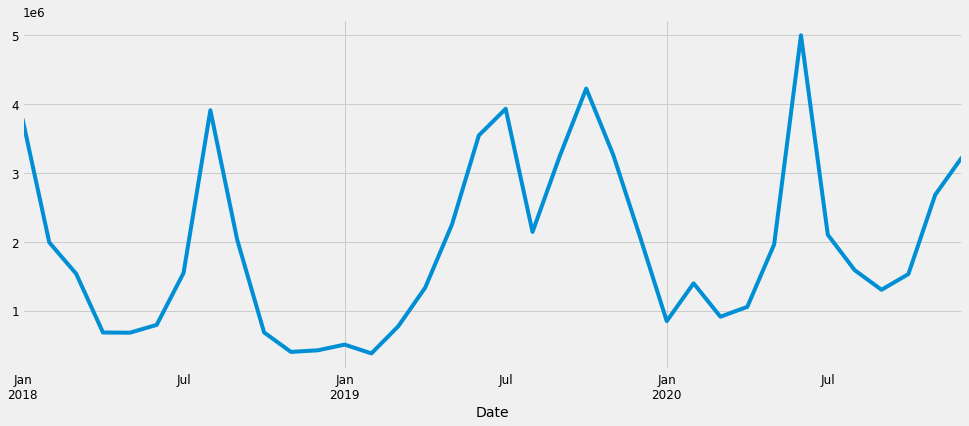

In [67]:
y.plot(figsize=(15, 6))
plt.show()

sales are always low at the beginning of the year and high at the end of the year
There is always an upward trend within any single year with a couple of low months in the mid of the year.

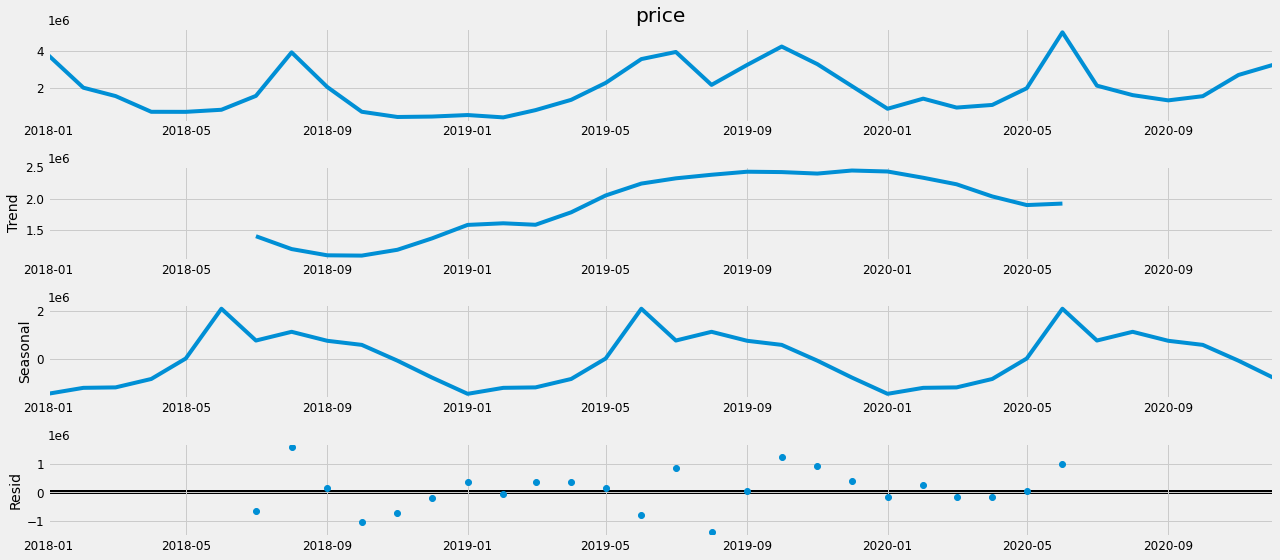

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### ARIMA: stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [70]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [71]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [72]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1125.0727190392442
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:741.6787028105981
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:728.6043641307214
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:345.36535767792725
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:761.237862566351
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:736.0069792326925
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:373.19056482088826
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:347.1975831141284
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1074.1727315569838
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:698.6478423830531
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:692.4660358689295
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:315.2854511120158
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:759.9539032590591
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:699.0291648935912
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:376.80411239112925
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:316.95791212695235
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1048.2226562257715
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:682.0184517814806
ARIM

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:286.545027675179

In [77]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1841      0.883      0.209      0.835      -1.546       1.914
ma.L1         -0.6802      0.714     -0.953      0.341      -2.079       0.719
ar.S.L12       0.2079      2.325      0.089      0.929      -4.349       4.765
ma.S.L12      -1.1713      1.636     -0.716      0.474      -4.378       2.035
sigma2      2.875e+12   2.86e-13      1e+25      0.000    2.87e+12    2.87e+12


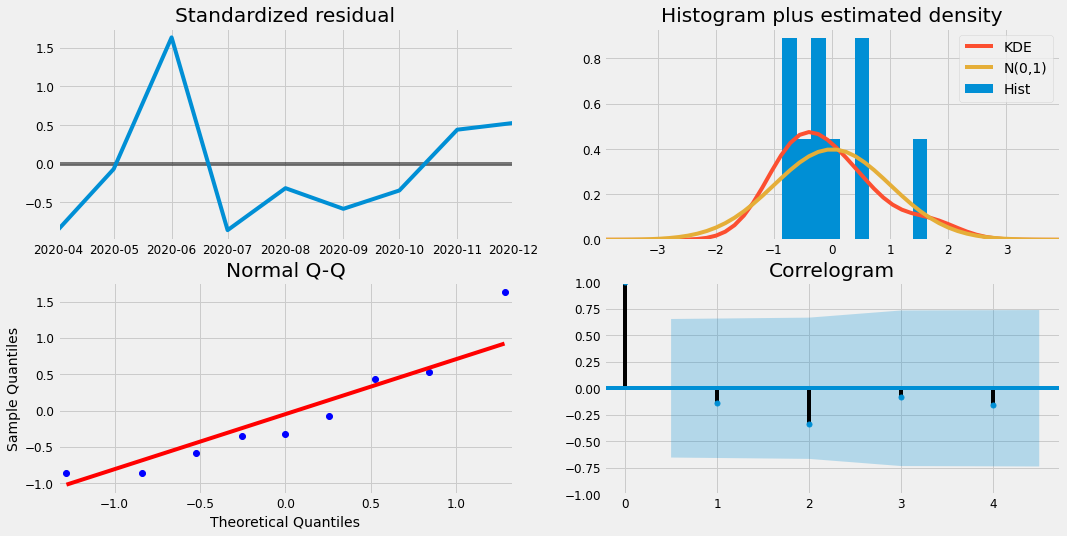

In [80]:
results.plot_diagnostics(lags=4, figsize=(16, 8))
plt.show()

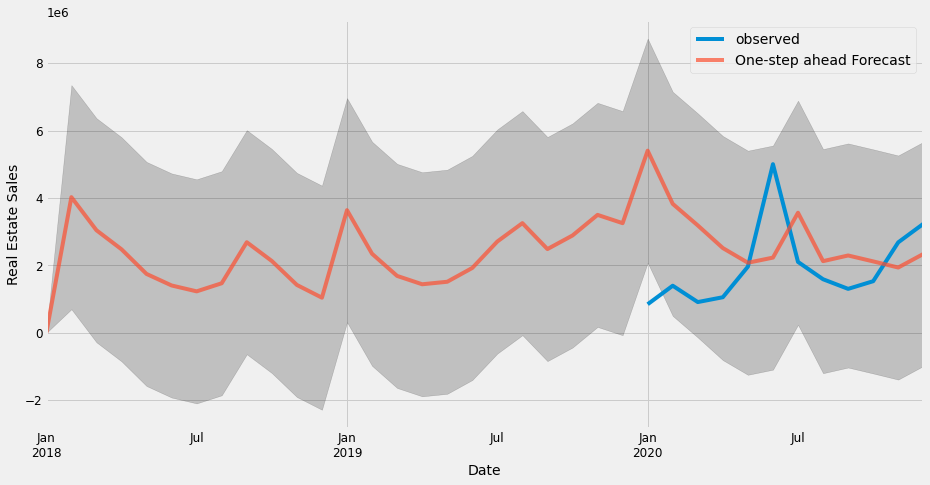

In [83]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Real Estate Sales')
plt.legend()
plt.show()

In [84]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2956880381263.86


## Producing and visualizing forecasts

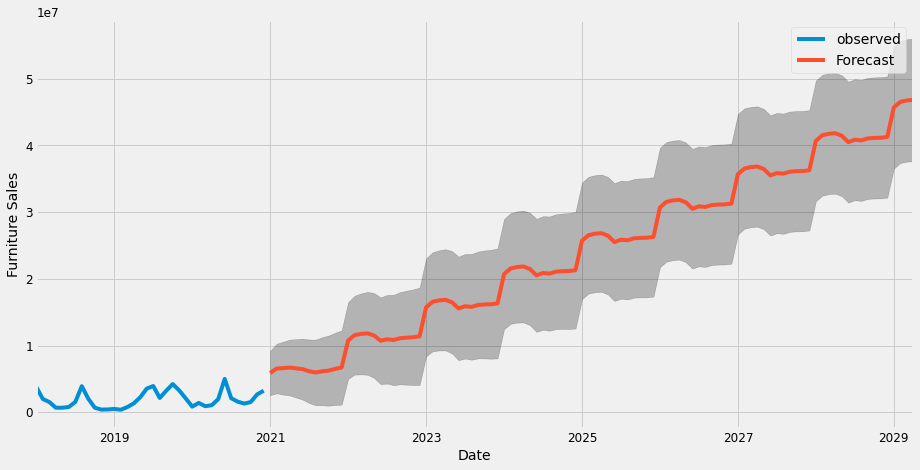

In [85]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b